# Assignment 1

In [2]:
from lib.roots import fixed_point
from lib.integrate import simpson, gaussian_quadrature, simpson_alt
from lib.plotter import plot
import math

### 1. Solve $e^{-x} - x = 0$ using the fixed-point method, accurate upto 4 placed in decimal.

In [3]:
def problem_one(x):
    return math.exp(-x) - x


fixed_point(problem_one, 0.5, tol=1e-4, maxiter=1000)

problem_one has a root at 0.5671188642569858.


### 2. Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal

$$\int_0^1 \sqrt{1+x^4}$$

In [4]:
def problem_two_simpson(x):
    return math.sqrt(1 + x**4)



# simpson(problem_two_simpson, 0, 1, 1e7)
simpson_alt(problem_two_simpson, 0, 1, 1e-8)

The value of the integral is 1.089429576103245.


1.0894310420080007

To calculate error in this value, we can calculate the fourth-order derivative of the given function and then use its maximum value.
The derivatives of given function are

$$f'(x) = \dfrac{2x^3}{\sqrt{1+x^4}}$$

$$f''(x) = \dfrac{2x^6 + 6x^2}{(1+x^4)^{3/2}}$$

$$f'''(x) = -\dfrac{12x(x^4 -1)}{(1+x^4)^{5/2}}$$

$$f''''(x) = \dfrac{60x^8 -168x^4 + 12}{(1+x^4)^{7/2}}$$

The maximum value of $f''''(x)$ can be found graphically as shown below:

Minimum value of y: -14.06093847425305
Maximum value of y: 11.99999999978992


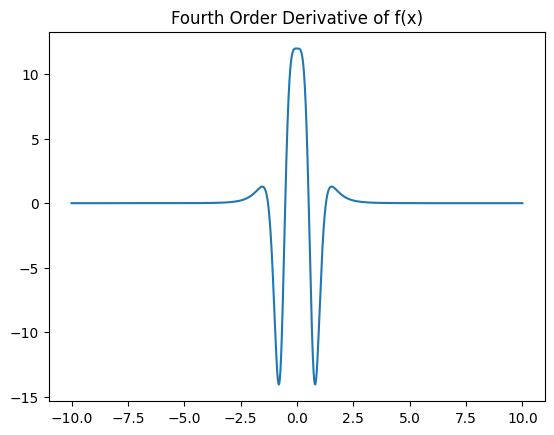

In [5]:
def fourth_order_derivative_problem_two(x):
    return (60*x**8 - 168*x**4 + 12) / (1+x**4)**3.5

plot(fourth_order_derivative_problem_two, (-10, 10), 10000, "Fourth Order Derivative of f(x)")



Now estimating the error as:

In [6]:
simpson(problem_two_simpson, 0, 1, 10000, maximum_value_of_error_func=11.99999999978992)

The value of the integral is 1.0895922915420657 with an error of 6.666666666549955e-18.


The next step is to use an appropriate Gaussian quadrature to solve the same integral. 
This can be done by changing the limits of integration by making an appropriate substitution
and rewriting the problem as

$$\int_{-1}^{1} \sqrt{1 + (2t-1)^4} dt$$

In [7]:
def problem_two_gaussian_quadrature(t):
    return math.sqrt(1 + (2*t - 1)**4)

gaussian_quadrature(...)


TypeError: gaussian_quadrature() missing 1 required positional argument: 'bounds'